### Assignment 2 (v2)

Используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.
Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). 
Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте предварительно применить к признакам standard scaling.

Эксперимент выглядит следующим образом. берем выборку. каждому объекту случайно назначаем метку sigma из {-1, 1}. учим лог рег с заданным коэф регуляризации. на обучающей выборке считаем среднее значение margin. margin = sigma * h(x)

потом берешь мат ожидание по sigma

т.е. делаешь 100 экспериментов с разным seed и усредняешь

и получаешь точку на графике для фиксированного коэф регуляризации


In [1]:
import numpy as np
import pandas as pd
import sklearn
import random
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [4]:
alpha=np.logspace(-2,2,5)

In [7]:
from sklearn.linear_model import LogisticRegression

def experiment(X, y, alpha):
    sigma = np.array([random.choice([-1, 1]) for el in range(y.shape[0])])
    lr = LogisticRegression(penalty='l2', C=alpha, random_state=np.random.randint(0, 1000, 1)[0]).fit(X, sigma)
    h = np.array([lr.decision_function(X[i:i+1,:]) for i in range(y.shape[0])])
    margins = sigma.reshape(sigma.shape[0], 1) * h
    return margins

In [8]:
mean_val = []
std_val = []
for c in alpha:
    vals = []
    for exp in range(100):
        margins = experiment(X_scaled, y, c)
        vals.append(abs(np.mean(margins)))
    mean_val.append(np.mean(vals))
    std_val.append(np.std(vals))

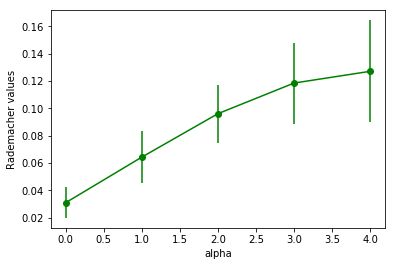

In [9]:
plt.errorbar(x=np.arange(len(alpha)), y=mean_val, yerr=std_val, fmt='-go')
plt.xlabel('alpha')
plt.ylabel('Rademacher values')
plt.show()

Из графика можно заметить, что чем выше альфа - тем выше сложность, причём она возрастает практически линейно.